In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' encoding fails, try 'latin-1'
    df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Data Organizing and cleaning**

In [ ]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Target'] = encoder.fit_transform(df['Target'])

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

Text Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import string
from string import punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text('hello naveen how are you I loving to learn machine learning')

'hello naveen love learn machin learn'

In [ ]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [ ]:
df

,Target,Text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size = 10,background_color='white')

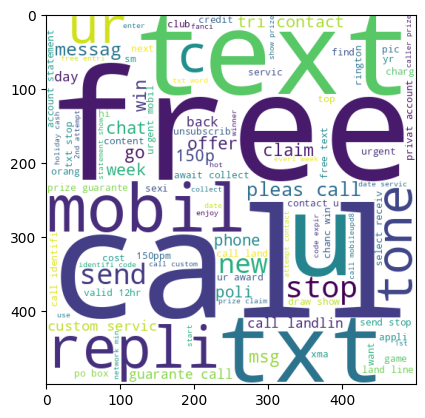

In [ ]:
spam_wc =  wc.generate(df[df['Target'] ==1] ['transformed_text'].astype(str).str.cat(sep=" "))
plt.imshow(spam_wc)

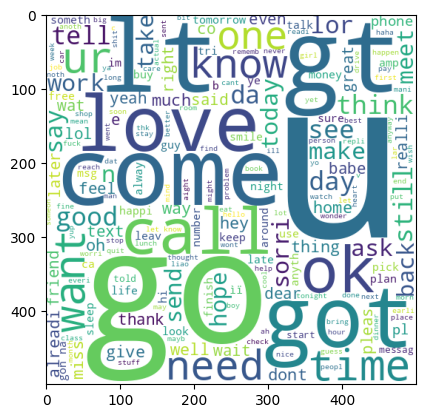

In [ ]:
spam_wc =  wc.generate(df[df['Target'] == 0] ['transformed_text'].astype(str).str.cat(sep=" "))
plt.imshow(spam_wc)

In [ ]:
spam_corpus=[]
for x in df[df['Target'] == 1]['transformed_text'].tolist():
  for word in x.split():
    spam_corpus.append(word)

In [ ]:
ham_corpus=[]
for x in df[df['Target'] == 0]['transformed_text'].tolist():
  for word in x.split():
    ham_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
word_counts = Counter(spam_corpus)
ham_counts = Counter(ham_corpus)

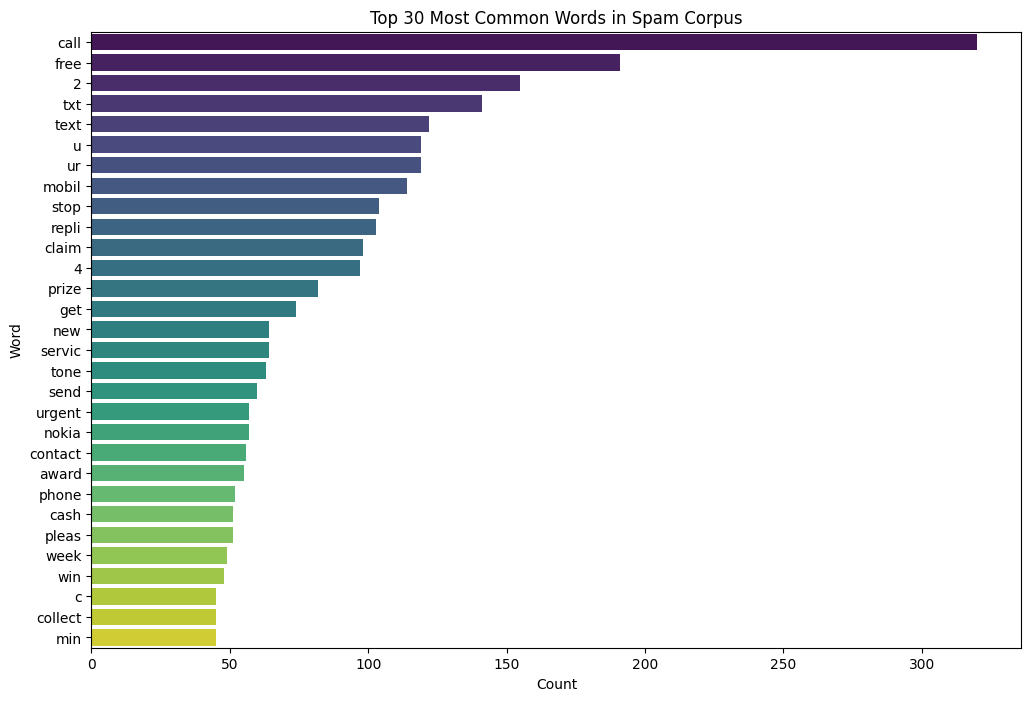

In [ ]:
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=word_counts_df, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

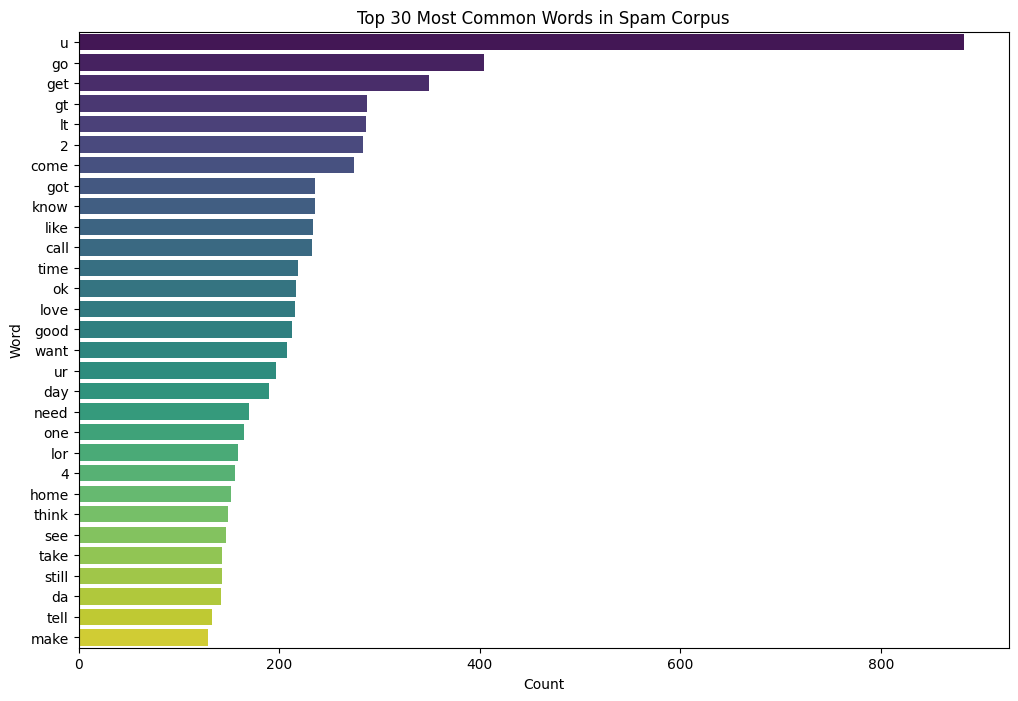

In [ ]:
ham_counts_df = pd.DataFrame(ham_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data = ham_counts_df, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
#df['transformed_text_str'] = df['transformed_text'].apply(lambda x: ' '.join(x))
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [ ]:
y = df['Target'].values

In [ ]:
print(X.shape)
print(y.shape)

(5169, 3000)
(5169,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135,)
(4135, 3000)
(1034, 3000)
(1034,)


In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
X_train.shape

(4135, 3000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
def train(algo,X_train,y_train):
  algo.fit(X_train,y_train)
  y_pred = algo.predict(X_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(precision_score(y_test,y_pred))

In [ ]:
train(gnb,X_train,y_train)

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [ ]:
train(bnb,X_train,y_train)

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [ ]:
train(mnb,X_train,y_train)

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(transform_text,open('transform_text.pkl','wb'))